In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.model_selection import train_test_split

In [61]:
data = pd.read_csv(r"/Users/matlida/Downloads/Google donwload/titanic.csv")

In [48]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [63]:
# 筛选特征
data=data.drop(["Name","Cabin","Ticket"],axis = 1)

In [64]:
# 处理缺失值,用均值进行填充
data["Age"]=data["Age"].fillna(data["Age"].mean())
data = data.dropna()

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1306 non-null   int64  
 1   Survived     1306 non-null   int64  
 2   Pclass       1306 non-null   int64  
 3   Sex          1306 non-null   object 
 4   Age          1306 non-null   float64
 5   SibSp        1306 non-null   int64  
 6   Parch        1306 non-null   int64  
 7   Fare         1306 non-null   float64
 8   Embarked     1306 non-null   object 
dtypes: float64(2), int64(5), object(2)
memory usage: 102.0+ KB


In [66]:
# 将数据转换为数值型
labels = data["Embarked"].unique().tolist()
data["Embarked"] = data["Embarked"].apply(lambda x: labels.index(x))

In [67]:
#此时可以看到embarked中的[s，c，q]便成[0，1，2]
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,0
1,2,1,1,female,38.0,1,0,71.2833,1
2,3,1,3,female,26.0,0,0,7.9250,0
3,4,1,1,female,35.0,1,0,53.1000,0
4,5,0,3,male,35.0,0,0,8.0500,0


In [68]:
data.loc[:,"Sex"] = (data["Sex"] == "male").astype(int)

In [69]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0
1,2,1,1,0,38.0,1,0,71.2833,1
2,3,1,3,0,26.0,0,0,7.9250,0
3,4,1,1,0,35.0,1,0,53.1000,0
4,5,0,3,1,35.0,0,0,8.0500,0


In [70]:
#此时可以看到数据都变成数值型的
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1306 non-null   int64  
 1   Survived     1306 non-null   int64  
 2   Pclass       1306 non-null   int64  
 3   Sex          1306 non-null   int64  
 4   Age          1306 non-null   float64
 5   SibSp        1306 non-null   int64  
 6   Parch        1306 non-null   int64  
 7   Fare         1306 non-null   float64
 8   Embarked     1306 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 102.0 KB


In [71]:

# 划分
x = data.iloc[:,data.columns != "Survived"]
y = data.iloc[:,data.columns == "Survived"]
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)
for i in [X_train,X_test,y_train,y_test]:
    i.index = range(i.shape[0])


In [72]:
# 模型

clf = DecisionTreeClassifier(random_state = 25)#实例化
clf = clf.fit(X_train,y_train)#训练
score = clf.score(X_test,y_test)

score

0.7959183673469388

In [60]:
# 使用交叉验证
from sklearn.model_selection import cross_val_score
clf = DecisionTreeClassifier(random_state = 25)
score = cross_val_score(clf,x,y,cv=10).mean()
score


0.7469611848825333

0.8166624106230849


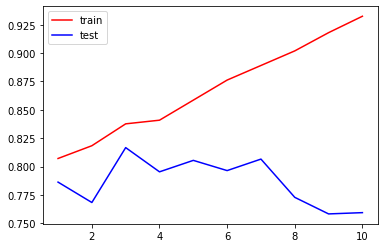

In [62]:
# 画学习曲线
tr = []
te = []
for i in range(10):
    clf = DecisionTreeClassifier(random_state = 25
                                ,max_depth = i+1
                                ,criterion = "entropy" 
                                )
    clf = clf.fit(X_train,y_train)
    score_tr = clf.score(X_train,y_train)
    score_te = cross_val_score(clf,x,y,cv = 10).mean()
    tr.append(score_tr)
    te.append(score_te)
print(max(te))
plt.plot(range(1,11),tr,color = "red",label = "train")
plt.plot(range(1,11),te,color = "blue",label = "test")
plt.legend()
plt.show()

In [73]:
#       -- 网格搜索能够同时调整多个参数的计数，本质是枚举计数，就是给出参数的取值范围，进行不断的尝试，可能非常费时间
import numpy as np
gini_threholds = np.linspace(0,0.5,20)
#信息增益的最小值
parameters = { "criterion":("gini","entropy")
              ,"splitter":("best","random")
              ,"max_depth":[*range(1,10)]
              ,"min_samples_leaf":[*range(1,50,5)]
              ,"min_impurity_decrease":[*np.linspace(0,0.5,50)]
             }
clf =  DecisionTreeClassifier(random_state = 25)
GS = GridSearchCV(clf,parameters,cv = 10)

In [74]:
GS = GS.fit(X_train,y_train) 

In [75]:
GS.best_params()

AttributeError: 'GridSearchCV' object has no attribute 'best_params'

In [ ]:
GS.best_score()